In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import datetime

def obtener_tiempo(dfr):
    #Esta funcion permite obtener una columna Datetime a partir del agno, dia, hora y minuto de los datos iniciales
    dfr['Day'] = pd.to_datetime(dfr['Day'], format='%j').dt.strftime('%m-%d')
    dfr['Hour'] = dfr['Hour'].astype(str).str.zfill(2)
    dfr['Datetime'] = pd.to_datetime(dfr[['Year','Day', 'Hour', 'Minute']]
                   .astype(str).apply(' '.join, 1), format='%Y %m-%d %H %M') 
    return dfr

def sustituir(dfr):
    #Sustitucion de los valores 9999... por NaN (sabemos que la fila 2 son todo valores nulos para cada variable)
    valores_null = dfr.iloc[2, 4:]
    for i in range(len(valores_null)):
        dfr.iloc[:,i+4] = dfr.iloc[:,i+4].replace(valores_null[i], np.nan)
    return dfr

def imputar_por_interpolacion(dfr):
    #Sustituye los valores NaN por valores aproximados mediante el metodo de interpolacion
    dfr = dfr.interpolate(method='linear', limit_direction='forward')
    return dfr

def imputar_por_KNND(dfr):
    #Este metodo es para imputar las filas que no se hayan podido imputar con interpolacion (primera fila)
    imputer = KNNImputer(n_neighbors=3, weights = 'distance')
    dfr[:] = imputer.fit_transform(dfr)
    return dfr

def normalizar_datos_standardScaler(dfr):
    #Dado un DataFrame, devuelve el DataFrame con valores normalizados
    x = dfr.values #returns a numpy array
    standard_scaler = preprocessing.StandardScaler()
    dfr[:] = standard_scaler.fit_transform(x)
    #dfr = pd.DataFrame(x_scaled)
    return dfr

def normalizar_datos_MinMaxScaler(dfr):
    #Dado un DataFrame, devuelve el DataFrame con valores normalizados
    x = dfr.values #returns a numpy array
    minmax_scaler = preprocessing.MinMaxScaler()
    dfr[:] = minmax_scaler.fit_transform(x)
    #dfr = pd.DataFrame(x_scaled)
    return dfr

def desnormalizar_datos(dfr):
    #Dado un DataFrame, devuelve el DataFrame con valores desnormalizados
    x = dfr.values
    min_max_scaler = preprocessing.MinMaxScaler()
    dfr[:] = min_max_scaler.inverse_transform(x)
    return dfr

def preprocesar(df):
  df = sustituir(df)
  df = imputar_por_interpolacion(df)
  df = imputar_por_KNND(df.iloc[:3, :])
  df = obtener_tiempo(df)
  df = df.drop(['Year', 'Day', 'Hour', 'Minute'], axis = 1)
  df = df.set_index('Datetime')

In [9]:
df = sustituir(df)
df = imputar_por_interpolacion(df)
imputar_por_KNND(df.iloc[:3, :])
df = obtener_tiempo(df)
df = df.drop(['Year', 'Day', 'Hour', 'Minute'], axis = 1)
df = df.set_index('Datetime')
df = normalizar_datos_standardScaler(df)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
Datetime,,,,,,,
1995-01-01 00:00:00,-1.424353,0.032687,0.291615,-0.189644,-1.146234,2.347966,-0.802707
1995-01-01 00:05:00,-1.460589,0.021451,0.278938,-0.138110,-1.146766,2.355286,-0.803304
1995-01-01 00:10:00,-1.394705,0.006564,0.324574,-0.164180,-1.145172,2.333336,-0.801513
1995-01-01 00:15:00,-1.328821,-0.008324,0.370210,-0.190250,-1.143577,2.311387,-0.799722
1995-01-01 00:20:00,-1.262937,-0.023212,0.415845,-0.216320,-1.141983,2.289437,-0.797931
...,...,...,...,...,...,...,...
2021-02-18 23:35:00,-0.930224,0.594484,0.002589,-0.550381,-0.621617,-0.347237,-0.352641
2021-02-18 23:40:00,-0.913753,0.616956,0.012730,-0.556443,-0.613645,-0.400151,-0.304812
2021-02-18 23:45:00,-0.920341,0.684372,0.007660,-0.453376,-0.621617,-0.351156,-0.351436


#**1-Montamos Drive para poder acceder a los datos y los leemos**

In [2]:
#Leemos los datos
#df = pd.read_csv('datos.csv', header=0)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/TFG_codigo/Prediccion_general/datos.csv', header=0)

#**2-Preprocesamos los datos y los normalizamos**

In [4]:
#2-Preprocesamos los datos
df = sustituir(df)
#df = imputar_por_interpolacion(df)
#imputar_por_KNND(df.iloc[:3, :])
df.fillna(method='ffill', inplace=True)
df = obtener_tiempo(df)
df = df.drop(['Year', 'Day', 'Hour', 'Minute'], axis = 1)
df = df.set_index('Datetime')
df['tormenta'] = 500
df = normalizar_datos_standardScaler(df) #Los datos se deben normalizar despues de la division de datos
df

KeyboardInterrupt: ignored

In [ ]:
df = normalizar_datos_standardScaler(df) #Los datos se deben normalizar despues de la division de datos

#**3-Fechas de tormentas geomagnéticas**

In [10]:
#ORIGINAL
TRAINING_STORMS_DATES_START = ['19980214', '19980802', '19980919', '19990216', '19991015', '20000709', '20000806', '20000915', '20001101',
                               '20010314', '20010406', '20011017', '20011031', '20020517', '20031115', '20040720', '20050510', '20060409', '20061209', '20120301']
TRAINING_STORMS_DATES_END = ['199802222359', '199808082359', '199809292359', '199902242359', '199910252359', '200007192359', '200008162359', '200009252359', '200011152359',
                             '200103242359', '200104162359', '200110222359', '200111102359', '200205272359', '200311252359', '200407302359', '200505202359', '200604192359', '200612192359', '201203112359']

VALIDATION_STORMS_DATES_START = [
    '19980428', '19990919', '20031025', '20150618', '20170901']
VALIDATION_STORMS_DATES_END = [
    '199805082359', '199909262359', '200311032359', '201506282359', '201709112359']

TESTING_STORMS_DATES_START = ['19980622', '19981102', '19990109', '19990413', '20000116', '20000402', '20000519',
                              '20010326', '20030526', '20030708', '20040118', '20041104', '20120910', '20130528', '20130626', '20150311', '20180822']
TESTING_STORMS_DATES_END = ['199806302359', '199811122359', '199901182359', '199904192359', '200001262359', '200004122359', '200005282359', '200104042359',
                            '200306062359', '200307182359', '200401272359', '200411142359', '201210052359', '201306042359', '201307042359', '201503212359', '201809032359']

**3.1-Definición de funciones para split de datos**

In [11]:
def split_tormentas(df, train_start_dates = TRAINING_STORMS_DATES_START, train_end_dates = TRAINING_STORMS_DATES_END,
                    val_start_dates = VALIDATION_STORMS_DATES_START, val_end_dates = VALIDATION_STORMS_DATES_END, test_start_dates = TESTING_STORMS_DATES_START, test_end_dates = TESTING_STORMS_DATES_END):
  
  indice_tormenta = 0
  
  tormentas_train = []
  tormentas_val   = []
  tormentas_test  = []

  for start, end in zip(train_start_dates, train_end_dates):
    tormenta = df.loc[start:end].copy()
    tormenta['tormenta'] = indice_tormenta
    tormentas_train.append(tormenta)
    indice_tormenta = indice_tormenta + 1

  for start, end in zip(val_start_dates, val_end_dates):
    tormenta = df.loc[start:end].copy()
    tormenta['tormenta'] = indice_tormenta
    tormentas_val.append(tormenta)
    indice_tormenta = indice_tormenta + 1

  for start, end in zip(test_start_dates, test_end_dates):
    tormenta = df.loc[start:end].copy()
    tormenta['tormenta'] = indice_tormenta
    tormentas_test.append(tormenta)
    indice_tormenta = indice_tormenta + 1

  df_train = tormentas_train[0]
  df_val   = tormentas_val[0]
  df_test  = tormentas_test[0]

  for tormenta in range(len(tormentas_train)):
    if(tormenta != 0):
      df_train = pd.concat((df_train, tormentas_train[tormenta]))

  for tormenta in range(len(tormentas_val)):
    if(tormenta != 0):
      df_val = pd.concat((df_val, tormentas_val[tormenta]))

  for tormenta in range(len(tormentas_test)):
    if(tormenta != 0):
      df_test = pd.concat((df_test, tormentas_test[tormenta]))
  

  return df_train, df_val, df_test

In [12]:
df_train, df_val, df_test = split_tormentas(df)

df_train.set_index('tormenta', append=True, inplace=True)
df_val.set_index('tormenta', append=True, inplace=True)
df_test.set_index('tormenta', append=True, inplace=True)

df_train = df_train.reorder_levels(['tormenta', 'Datetime'])
df_val = df_val.reorder_levels(['tormenta', 'Datetime'])
df_test = df_test.reorder_levels(['tormenta', 'Datetime'])


df_train

IMF(nT)  ...  Proton Temperature(K)
tormenta Datetime                       ...                       
0        1998-02-14 00:00:00 -0.202208  ...              -0.547556
         1998-02-14 00:05:00 -0.238444  ...              -0.367518
         1998-02-14 00:10:00 -0.258209  ...              -0.356275
         1998-02-14 00:15:00 -0.281268  ...              -0.436890
         1998-02-14 00:20:00 -0.284563  ...              -0.319208
...                                ...  ...                    ...
19       2012-03-11 23:35:00 -0.551392  ...              -0.825987
         2012-03-11 23:40:00 -0.551392  ...              -0.827257
         2012-03-11 23:45:00 -0.584334  ...              -0.777228
         2012-03-11 23:50:00 -0.610687  ...              -0.791646
         2012-03-11 23:55:00 -0.607393  ...              -0.902278

[60768 rows x 7 columns]

NORMALIZACION CON STANDARDSCALER

In [ ]:
df_train = normalizar_datos_standardScaler(df_train)
df_val = normalizar_datos_standardScaler(df_val)
df_test = normalizar_datos_standardScaler(df_test)

In [ ]:
df_train.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,6.076800e+04,6.076800e+04,6.076800e+04,6.076800e+04,6.076800e+04,6.076800e+04,6.076800e+04
mean,3.934360e-16,8.195577e-16,7.451510e-16,7.143997e-16,-2.681322e-15,2.395981e-15,1.198572e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.317148e+00,-8.636086e+00,-5.333780e+00,-9.444638e+00,-1.812483e+00,-1.069130e+00,-7.562960e-01
25%,-5.727157e-01,-6.489607e-01,-5.543221e-01,-3.886166e-01,-7.902657e-01,-6.004601e-01,-5.190744e-01
50%,-3.281164e-01,6.968042e-02,-5.871096e-02,3.819290e-02,-1.823113e-01,-2.811917e-01,-2.655374e-01
75%,1.858967e-01,7.022447e-01,4.679781e-01,4.759462e-01,6.485860e-01,2.284099e-01,1.860856e-01
max,8.511136e+00,6.395324e+00,6.974714e+00,6.283473e+00,4.566690e+00,1.063329e+01,2.996140e+01


In [ ]:
df_val.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,1.468800e+04,1.468800e+04,1.468800e+04,1.468800e+04,1.468800e+04,1.468800e+04,1.468800e+04
mean,2.214785e-15,7.157930e-15,4.299195e-15,-7.281284e-16,-6.411022e-15,-5.316319e-15,9.930857e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-1.547870e+00,-6.385528e+00,-6.526159e+00,-7.249298e+00,-1.805914e+00,-7.608392e-01,-7.004616e-01
25%,-6.639755e-01,-7.528239e-01,-5.596426e-01,-4.654094e-01,-7.066670e-01,-4.735645e-01,-5.510722e-01
50%,-3.045669e-01,9.047928e-02,-1.826813e-02,-6.074305e-02,-1.750698e-01,-3.172532e-01,-3.595283e-01
75%,4.936547e-01,6.633645e-01,5.952896e-01,4.355459e-01,5.640160e-01,1.085955e-02,4.402798e-02
max,7.589886e+00,4.248905e+00,5.965344e+00,6.305117e+00,3.581428e+00,8.792454e+00,1.626549e+01


In [ ]:
df_test.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,5.472000e+04,5.472000e+04,5.472000e+04,5.472000e+04,5.472000e+04,5.472000e+04,5.472000e+04
mean,-1.166905e-15,-3.284065e-16,2.360320e-16,7.930907e-17,9.958895e-16,2.072092e-16,6.537777e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.265629e+00,-1.109721e+01,-9.139038e+00,-9.085666e+00,-1.738710e+00,-1.076097e+00,-9.708135e-01
25%,-5.534856e-01,-7.043469e-01,-5.610906e-01,-3.699972e-01,-7.536854e-01,-6.019889e-01,-6.441225e-01
50%,-2.690152e-01,-1.194454e-02,-5.203616e-02,4.906151e-02,-3.026158e-01,-2.847148e-01,-2.984078e-01
75%,1.838152e-01,7.169000e-01,5.178009e-01,4.380532e-01,6.789186e-01,2.452771e-01,3.278259e-01
max,1.250700e+01,6.545379e+00,1.014805e+01,1.000311e+01,3.811976e+00,1.031152e+01,1.163623e+01


NORMALIZACION CON MINMAXSCALER

In [ ]:
df_train = normalizar_datos_MinMaxScaler(df_train)
df_val   = normalizar_datos_MinMaxScaler(df_val)
df_test  = normalizar_datos_MinMaxScaler(df_test)

In [ ]:
df_train.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,60768.000000,60768.000000,60768.000000,60768.000000,60768.000000,60768.000000,60768.000000
mean,0.134016,0.574536,0.433341,0.600494,0.284125,0.091360,0.024621
std,0.101748,0.066528,0.081245,0.063581,0.156761,0.085453,0.032555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075744,0.531362,0.388306,0.575786,0.160243,0.040049,0.007723
50%,0.100631,0.579172,0.428571,0.602922,0.255546,0.067331,0.015976
75%,0.152931,0.621254,0.471362,0.630755,0.385797,0.110878,0.030679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_val.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,14688.000000,14688.000000,14688.000000,14688.000000,14688.000000,14688.000000,14688.000000
mean,0.169393,0.600458,0.522448,0.534829,0.335214,0.079642,0.041286
std,0.109440,0.094037,0.080057,0.073779,0.185627,0.104680,0.058944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096730,0.529667,0.477646,0.500493,0.204043,0.030071,0.008805
50%,0.136062,0.608966,0.520985,0.530348,0.302718,0.046433,0.020095
75%,0.223416,0.662837,0.570103,0.566962,0.439907,0.080778,0.043881
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_test.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000
mean,0.091895,0.629001,0.473842,0.475969,0.313242,0.094497,0.077006
std,0.072608,0.056682,0.051849,0.052387,0.180160,0.087815,0.079321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051707,0.589078,0.444751,0.456586,0.177460,0.041634,0.025913
50%,0.072362,0.628324,0.471144,0.478539,0.258724,0.069495,0.053336
75%,0.105241,0.669636,0.500689,0.498917,0.435555,0.116036,0.103009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#4-Creación de datasets

In [13]:
def multivariate_multioutput_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data)[:,:,:,np.newaxis,np.newaxis], np.array(labels)[:,:,:,np.newaxis,np.newaxis]





def timeseries_dataset_from_df1(df, window_entrada = 40, window_salida = 4):
    dataset_x_total = None    
    dataset_y_total = None

    start_ind = 0
    step = 1
    for indice_tormenta, datos_tormenta in df.groupby("tormenta"):
        dataset_x , dataset_y = multivariate_multioutput_data(
            datos_tormenta.values,
            datos_tormenta.values, 
            start_ind,
            None,
            window_entrada,
            window_salida,
            step)

        if dataset_x_total is None:
            dataset_x_total = dataset_x
            dataset_y_total = dataset_y 
        else:
            dataset_x_total = np.concatenate((dataset_x_total, dataset_x))
            dataset_y_total = np.concatenate((dataset_y_total, dataset_y))

    return dataset_x_total, dataset_y_total

In [14]:
#OBTENEMOS LOS datasets x e y
x_train , y_train = timeseries_dataset_from_df1(df_train)
x_val , y_val     = timeseries_dataset_from_df1(df_val)
x_test , y_test   = timeseries_dataset_from_df1(df_test)


train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(2)

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.cache().batch(2)


test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.cache().batch(2)

**Forma de los datasets**

In [ ]:
print (x_train.shape,
       y_train.shape,
       x_val.shape,
       y_val.shape,
       x_test.shape,
       y_test.shape,
       'Single window of past history : {}'.format(x_train[0].shape),
       'Target temperature to predict : {}'.format(y_train[0].shape),
       sep='\n')

(59888, 40, 7, 1, 1)
(59888, 4, 7, 1, 1)
(14468, 40, 7, 1, 1)
(14468, 4, 7, 1, 1)
(53972, 40, 7, 1, 1)
(53972, 4, 7, 1, 1)
Single window of past history : (40, 7, 1, 1)
Target temperature to predict : (4, 7, 1, 1)


In [ ]:
model_c.save_weights("/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_150epochs.h5")
import pickle
with open('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_150epochs_history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

#5-CARGAMOS LOS MODELOS

**MODELO BASELINE**

In [15]:
#codigo baseline
def baseline(x_val, y_val):
  num_predicciones = len(y_val)
  timesteps_futuros = len(y_val[0])
  timesteps_pasados = len(x_val[0])
  variables = len(x_val[0][0])
  predicciones = np.zeros(shape=(y_val.shape))
  for prediccion in range(num_predicciones):
      dato = x_val[prediccion][timesteps_pasados-1]
      for num_timesteps_a_predecir in range(timesteps_futuros):
          predicciones[prediccion][num_timesteps_a_predecir] = dato
  return predicciones


**MODELO SIMPLE**

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
def build_model_simplificado(input_timesteps, output_timesteps, num_links, num_inputs):    
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1)))
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 1),                       
                         padding = 'same', 
                         return_sequences = False))
    
    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))
    
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))
    
    model.add(ConvLSTM2D(name ='conv_lstm',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2'))

    optimizer = tf.keras.optimizers.RMSprop(lr=0.003, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model

**MODELO COMPLEJO**

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
def build_model_complejo(input_timesteps, output_timesteps, num_links, num_inputs):    
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1)))
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 1),                       
                         padding = 'same', 
                         return_sequences = True))
    
    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    model.add(ConvLSTM2D(name ='conv_lstm_2',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = False))
    
    model.add(Dropout(0.20, name = 'dropout_2'))
    model.add(BatchNormalization(name = 'batch_norm_2'))
    
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))
    
    model.add(ConvLSTM2D(name ='conv_lstm_3',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(Dropout(0.20, name = 'dropout_3'))
    model.add(BatchNormalization(name = 'batch_norm_3'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2', activation = 'linear'))
    
    optimizer = tf.keras.optimizers.RMSprop(lr=0.008, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model
    
modelo_c = build_model_complejo(x_train.shape[1], y_train.shape[1], y_train.shape[2], x_train.shape[2])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**MODELO COMPLEJO SIMPLIFICADO** El número de parámetros optimos para resolver un problema en función del tamaño del dataset = 2 veces el dataset + d, es decir, algo más que dos veces el dataset. En nuestro caso, antes teníamos un dataset de 2.3 millones de datos, pero ahora es de unos 2

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
def build_model_complejo(input_timesteps, output_timesteps, num_links, num_inputs):    
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1)))
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 32, kernel_size = (10, 1),                       
                         padding = 'same', 
                         return_sequences = True))
    
    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    model.add(ConvLSTM2D(name ='conv_lstm_2',
                         filters = 32, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = False))
    
    model.add(Dropout(0.20, name = 'dropout_2'))
    model.add(BatchNormalization(name = 'batch_norm_2'))
    
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 32)))
    
    model.add(ConvLSTM2D(name ='conv_lstm_3',
                         filters = 32, kernel_size = (10, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(Dropout(0.20, name = 'dropout_3'))
    model.add(BatchNormalization(name = 'batch_norm_3'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_4',
                         filters = 32, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2', activation = 'linear'))
    
    optimizer = tf.keras.optimizers.RMSprop(lr=0.008, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model
    
modelo_c = build_model_complejo(x_train.shape[1], y_train.shape[1], y_train.shape[2], x_train.shape[2])
modelo_c.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_norm_0 (BatchNormaliza (None, 40, 7, 1, 1)       4         
_________________________________________________________________
conv_lstm_1 (ConvLSTM2D)     (None, 40, 7, 1, 32)      42368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 7, 1, 32)      0         
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 40, 7, 1, 32)      128       
_________________________________________________________________
conv_lstm_2 (ConvLSTM2D)     (None, 7, 1, 32)          41088     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 1, 32)          0         
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 7, 1, 32)         

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**CARGAMOS EL MODELO COMPLEJO DE LAS PREDICCIONES GENERALES**

In [ ]:
model_c = build_model_complejo(x_train.shape[1], y_train.shape[1], y_train.shape[2], x_train.shape[2])
model_c.load_weights('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/modelo_complejo_150epochs_pesos.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
predicciones_c = model_c.predict(x_test, verbose=1)

1687/1687 [==============================] - 102s 60ms/step


In [ ]:
np.save('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/predicciones_tormenta', predicciones_c)
predicciones_c = np.load('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/predicciones_tormenta.npy')

In [20]:
predicciones_baseline = baseline(x_test, y_test)
np.save('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/predicciones_tormenta_baseline', predicciones_baseline)
predicciones_baseline = np.load('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/predicciones_tormenta_baseline.npy')

In [17]:
predicciones   = [predicciones_baseline, predicciones_c]
nombre_modelos = ['Baseline', 'Complejo']
variables      = df_train.columns

NameError: ignored

In [ ]:
variables

Index(['IMF(nT)', 'Bx GSM(nT)', 'By GSM(nT)', 'Bz GSM(nT)', 'Flow Speed(km/s)',
       'Proton Density(n/cc)', 'Proton Temperature(K)'],
      dtype='object')

In [ ]:
df_train.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,60768.000000,60768.000000,60768.000000,60768.000000,60768.000000,60768.000000,60768.000000
mean,0.777631,-0.064570,0.195298,-0.101686,0.674167,-0.230040,0.334237
std,1.863041,1.399218,1.548841,1.655951,1.261619,0.952750,1.726760
min,-1.676250,-12.148239,-8.065808,-15.741410,-1.612477,-1.248645,-0.971693
25%,-0.289353,-0.972600,-0.663251,-0.745210,-0.322839,-0.802124,-0.562072
50%,0.166342,0.032928,0.104365,-0.038441,0.444162,-0.497943,-0.124278
75%,1.123961,0.918016,0.920116,0.686451,1.492429,-0.012424,0.655560
max,16.634094,8.883810,10.997930,10.303350,6.435543,9.900744,52.069941


In [ ]:
df_val.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,14688.000000,14688.000000,14688.000000,14688.000000,14688.000000,14688.000000,14688.000000
mean,0.713686,0.309743,-0.015674,0.124124,0.959258,-0.173701,0.990016
std,1.580337,1.398340,1.333716,1.582397,1.355624,1.384696,2.764785
min,-1.732387,-8.619090,-8.719422,-11.346754,-1.488800,-1.227197,-0.946544
25%,-0.335583,-0.742925,-0.762053,-0.612313,0.001316,-0.829422,-0.533528
50%,0.232384,0.436259,-0.040038,0.028008,0.721937,-0.612986,-0.003969
75%,1.493800,1.237320,0.778246,0.813307,1.723826,-0.158665,1.111739
max,12.707855,6.250953,7.940132,10.100984,5.814163,12.000760,45.959067


In [ ]:
df_test.describe()

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
count,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000,54720.000000
mean,0.506506,0.039214,0.031898,-0.096154,0.344270,-0.024243,0.121849
std,1.706393,1.229755,1.333755,1.607296,1.143195,1.081656,1.103717
min,-1.653135,-13.607515,-12.157229,-14.699378,-1.643397,-1.188199,-0.949645
25%,-0.437949,-0.826952,-0.716452,-0.690843,-0.517332,-0.675382,-0.589073
50%,0.047465,0.024525,-0.037504,-0.017298,-0.001676,-0.332204,-0.207506
75%,0.820165,0.920817,0.722512,0.607921,1.120399,0.241060,0.483673
max,21.848167,8.088351,13.566784,15.981669,4.702062,11.129166,12.964830


#5.1-Entrenamiento del modelo complejo

In [ ]:
#Crear y entrenar modelo
#/content/drive/MyDrive/TFG_codigo/modelo_simplificado_100epochs.h5
import time
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
EPOCHS = 150
steps_per_epoch = 350
validation_steps = 500

path_checkpoint = "/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_2.h5"
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


modelstart = time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, restore_best_weights=True)
model_c = build_model_complejo(x_train.shape[1], 4, y_train.shape[2], x_train.shape[2])
print(model_c.summary())

# Train
print("\nTRAIN MODEL...")
history = model_c.fit(train_data,
                    epochs = 150,
                    validation_data=val_data,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=1,
                    callbacks=[early_stopping, modelckpt_callback])

model_c.save_weights("/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_2.h5")
import pickle
with open('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_2_history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
print("\nModel Runtime: %0.2f Minutes"%((time.time() - modelstart)/60))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_norm_0 (BatchNormaliza (None, 40, 7, 1, 1)       4         
_________________________________________________________________
conv_lstm_1 (ConvLSTM2D)     (None, 40, 7, 1, 64)      166656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 7, 1, 64)      0         
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 40, 7, 1, 64)      256       
_________________________________________________________________
conv_lstm_2 (ConvLSTM2D)     (None, 7, 1, 64)          164096    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 1, 64)          0         
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 7, 1, 64)        

KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model

model_c.save('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_2_BUENO.h5')

In [ ]:
model_c = load_model('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_2_BUENO.h5')

**5.2-CARGAMOS LOS MODELOS**

In [ ]:
import pickle
modelo_c = build_model_complejo(x_train.shape[1], y_train.shape[1], y_train.shape[2], x_train.shape[2])
modelo_c.load_weights('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_150epochs.h5')
history_c = pickle.load(open('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_150epochs_history', "rb"))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#4-Evaluación de los modelos y comparativa

In [ ]:
def plot_train_history(history, title):
    loss = history['loss']
    val_loss = history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

**4.1-Históricos de los modelos orientados a predicción general**

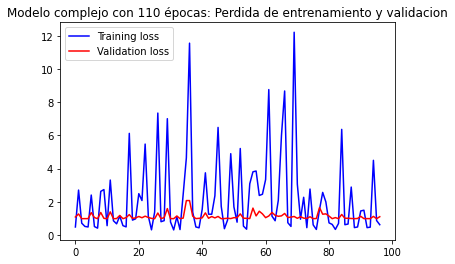

In [ ]:
#Modelos todas variables
#plot_train_history(history_s, 'Modelo simple con 100 épocas: Perdida de entrenamiento y validacion')
plot_train_history(history_c, 'Modelo complejo con 110 épocas: Perdida de entrenamiento y validacion')

**4.2.1-Predición de modelo complejo y baseline**

In [ ]:
#Obtneemos las predicciones de los modelos Bz y By
variables = df.columns
predicciones_c = modelo_c.predict(x_test, verbose=1)
predicciones_baseline = baseline(x_test, y_test)

1687/1687 [==============================] - 102s 60ms/step


In [18]:
predicciones_baseline = baseline(x_test, y_test)


In [ ]:
predicciones_c.shape, predicciones_baseline.shape

((54465, 5, 7, 1, 1), (54465, 5, 7, 1, 1))

**4.2.1.1Guardamos las predicciones**

In [ ]:
#Guardamos las predicciones realizadas
np.save('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_150epochs_predicciones', predicciones_c)
np.save('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/baseline_predicciones', predicciones_baseline)

**4.2.1.2-Cargar las predicciones calculadas**

In [ ]:
predicciones_c        = np.load('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/model_c_150epochs_predicciones.npy')
predicciones_baseline = np.load('/content/drive/MyDrive/TFG_codigo/Prediccion_tormentas/Modelo_C/baseline_predicciones.npy')

In [ ]:
predicciones   = [ predicciones_c]
nombre_modelos = ['Complejo']
variables      = df_train.columns

In [ ]:
predicciones   = [predicciones_baseline, predicciones_c]
nombre_modelos = ['Baseline', 'Complejo']
variables      = df_train.columns

**4.2.2.1-Guardamos las predicciones de los modelos realizadas**

**4.3-Comparativa de los modelos**

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def obtener_metricas(y_val, y_preds, nombre_modelos):
    #Aplanamos los datos para que se puedan calcular las metricas
    y_val = np.squeeze(y_val)
    y_val = y_val.ravel()
    datos_mse  = []
    datos_r2   = []
    datos_rmse = []
    datos_mae  = []
    columnas   = []
    for modelo in range(len(nombre_modelos)):
        y_pred = np.squeeze(y_preds[modelo])
        y_pred = y_pred.ravel()
        #Calculamos las metricas
        r2   = r2_score(y_val, y_pred)
        mse  = mean_squared_error(y_val, y_pred)
        mae  = mean_absolute_error(y_val, y_pred)
        rmse = mse**0.5
        #Los anadimos a las listas correspondientes
        datos_mse.append(mse)
        datos_r2.append(r2)
        datos_rmse.append(rmse)
        datos_mae.append(mae)
        #Creamos una columna por modelo
        columnas.append(nombre_modelos[modelo])

    #Mostramos los resultados en forma de df
    nombres_metricas = ['R2', 'RMSE', 'MSE', 'MAE']
    valores = [datos_r2, datos_rmse, datos_mse, datos_mae]

    metricas = pd.DataFrame(valores, columns = columnas, index = nombres_metricas)
    return metricas



def desglose_por_timestep(y_val, predicciones):
    num_predicciones = predicciones.shape[0]
    num_timesteps   = predicciones.shape[1]

    timesteps_y_val  = []
    timesteps_y_pred = []
    
    #Creamos 4 listas, una para cada timestep
    for lista_timestep in range(num_timesteps):
        timestep_valN = []
        timesteps_y_val.append(timestep_valN)
        timestep_predN = []
        timesteps_y_pred.append(timestep_predN)
    #Metemos en cada una de los 4 listas, el correspondiente timestep de cada prediccion
    for prediccion in range(num_predicciones):
        for timestep in range(num_timesteps):
            timesteps_y_pred[timestep].append(predicciones[prediccion][timestep])
            timesteps_y_val[timestep].append(y_val[prediccion][timestep])
    
    return timesteps_y_val, timesteps_y_pred

def comparacion_modelos_timestep(y_val, predicciones, nombre_modelos):
  timesteps = y_val.shape[1]

  timesteps_y_preds = []

  for modelo in range(len(nombre_modelos)):
      timesteps_y_val, timesteps_y_pred_modelo = desglose_por_timestep(y_val, predicciones[modelo])
      timesteps_y_preds.append(timesteps_y_pred_modelo)
  for timestep in range(timesteps):
      timesteps_modelos = []
      for modelo in range(len(nombre_modelos)):
          timesteps_modelos.append(timesteps_y_preds[modelo][timestep])
      print("=========TIMESTEP: ",timestep,"=========\n",obtener_metricas(timesteps_y_val[timestep], timesteps_modelos, nombre_modelos))


def comparacion_modelos_timestep_variables(y_val, predicciones, nombre_modelos, nombre_variables):
  timesteps = y_val.shape[1]

  desglose_preds = []
  for modelo in range(len(nombre_modelos)):
      desglose_val, desglose_pred = agrupar_variables_timestep(y_val, predicciones[modelo])
      desglose_preds.append(desglose_pred)
  
  for paso in range(timesteps):
    print("===================TIMESTEP ", paso,"===================")
    for variable in range(len(nombre_variables)):
        variableN_modelos = []
        for modelo in range(len(nombre_modelos)):
          variableN_modelos.append(desglose_preds[modelo][paso][variable])
        print("=====VARIABLE", nombre_variables[variable],"====")
        print(obtener_metricas(desglose_val[paso][variable], variableN_modelos, nombre_modelos))


def agrupar_variables_timestep(y_val, y_pred):
    num_predicciones = y_val.shape[0]
    num_timesteps    = y_val.shape[1]
    num_variables    = y_val.shape[2]
    #Creacion de listas
    desglose_val  = []
    desglose_pred = []
    for paso in range(num_timesteps):
        timestepN_val  = []
        timestepN_pred = []
        for i in range(num_variables):
            timestepN_varI_val = []
            timestepN_val.append(timestepN_varI_val)
            
            timestepN_varI_pred = []
            timestepN_pred.append(timestepN_varI_pred)
            
        desglose_val.append(timestepN_val)
        desglose_pred.append(timestepN_pred)
    
    #Desglose
    for prediccion in range(num_predicciones):
        for paso in range(num_timesteps):
            for var in range(num_variables):
                desglose_val[paso][var].append(y_val[prediccion][paso][var])
                desglose_pred[paso][var].append(y_pred[prediccion][paso][var])
    
    return desglose_val, desglose_pred




def resumen_comparativa(y_val, predicciones, nombre_modelos, variables):
    pd.set_option("display.max_rows", None, "display.max_columns", None)

    #1-Comparativa general de los modelos
    print("===================================================COMPARATIVA GENERAL DE LOS MODELOS===================================================")
    print(obtener_metricas(y_val, predicciones, nombre_modelos))

    #2-Comparativa por timestep de los modelos
    print("===================================================COMPARATIVA POR TIMESTEP DE LOS MODELOS===================================================")
    print(comparacion_modelos_timestep(y_val, predicciones, nombre_modelos))

    print("===================================================COMPARATIVA POR TIMESTEP Y VARIABLES DE LOS MODELOS===================================================")
    #3-Comparativa por timestep y variable de los modelos
    print(comparacion_modelos_timestep_variables(y_val, predicciones, nombre_modelos, variables))


In [ ]:
resumen_comparativa(y_test, predicciones, nombre_modelos, variables)

===================================================COMPARATIVA GENERAL DE LOS MODELOS===================================================
      Complejo
R2    0.859157
RMSE  0.507406
MSE   0.257461
MAE   0.231088
===================================================COMPARATIVA POR TIMESTEP DE LOS MODELOS===================================================
=========TIMESTEP:  0 =========
       Complejo
R2    0.910704
RMSE  0.403973
MSE   0.163194
MAE   0.172211
=========TIMESTEP:  1 =========
       Complejo
R2    0.869795
RMSE  0.487847
MSE   0.237995
MAE   0.221214
=========TIMESTEP:  2 =========
       Complejo
R2    0.840469
RMSE  0.540046
MSE   0.291650
MAE   0.253068
=========TIMESTEP:  3 =========
       Complejo
R2    0.815687
RMSE  0.580522
MSE   0.337006
MAE   0.277861
None
===================================================COMPARATIVA POR TIMESTEP Y VARIABLES DE LOS MODELOS===================================================
===================TIMESTEP  0 ===================
====

In [ ]:
len(predicciones), len(predicciones[0]), len(predicciones[0][0]), len(predicciones[0][0][0]), len(predicciones[0][0][0][0]), len(predicciones[0][0][0][0][0])

(2, 53972, 4, 7, 1, 1)

In [ ]:
predicciones.shape

AttributeError: ignored

In [ ]:
resumen_comparativa(y_val_multi_bz_by, predicciones_bz_by, nombre_modelos_bz_by, variables_bz_by)

**Por si queremos visualizar como predicen nuestros modelos**

In [ ]:
def multi_step_output_plot(history, true_future, prediction, columnas):
    plt.figure(figsize=(18, 15))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    #for i, (var, c) in enumerate(zip(features.columns[:2], ['b','r'])):
    #for i, (var, c) in enumerate(zip(df.columns, ['b','r','g','y','c','m','k'])):
    for i, (var, c) in enumerate(zip(columnas, ['b','r','g','y','c','m','k'])):
        plt.plot(num_in, np.array(history[:, i]), c, label=var)
        plt.plot(np.arange(num_out)/STEP, np.array(true_future[:,i]), c+'o', markersize=5, alpha=0.5,
               label=f"True {var.title()}")
        if prediction.any():
            plt.plot(np.arange(num_out)/STEP, np.array(prediction[:,i]), '*', markersize=5, alpha=0.5,
                     label=f"Predicted {var.title()}")
    
    plt.legend(loc='upper left')
    plt.show()

#======================================================SEPARADOR===========================================-

In [21]:
predicciones_baseline = np.load('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/predicciones_tormenta_baseline.npy')
predicciones_c = np.load('/content/drive/MyDrive/TFG_codigo/Prediccion_general/Modelo_Complejo/predicciones_tormenta.npy')


In [25]:
predicciones   = [predicciones_baseline, predicciones_c]
nombre_modelos = ['Baseline', 'Complejo']
variables      = df_train.columns

resumen_comparativa(y_test, predicciones, nombre_modelos, variables)

===================================================COMPARATIVA GENERAL DE LOS MODELOS===================================================
      Baseline  Complejo
R2    0.887366  0.854530
RMSE  0.453757  0.515674
MSE   0.205895  0.265920
MAE   0.201620  0.239093
===================================================COMPARATIVA POR TIMESTEP DE LOS MODELOS===================================================
=========TIMESTEP:  0 =========
       Baseline  Complejo
R2    0.951568  0.905997
RMSE  0.297509  0.414483
MSE   0.088512  0.171796
MAE   0.131172  0.181083
=========TIMESTEP:  1 =========
       Baseline  Complejo
R2    0.902237  0.865214
RMSE  0.422725  0.496356
MSE   0.178697  0.246369
MAE   0.190187  0.229409
=========TIMESTEP:  2 =========
       Baseline  Complejo
R2    0.864516  0.835906
RMSE  0.497683  0.547716
MSE   0.247688  0.299993
MAE   0.227749  0.260719
=========TIMESTEP:  3 =========
       Baseline  Complejo
R2    0.831176  0.811030
RMSE  0.555594  0.587811
MSE   0.308685